# The mathematical building blocks of neural networks

**Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

**The network architecture**

**Preparing the image data**

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import sparse_categorical_crossentropy
import numpy as np
import matplotlib.pyplot as plt

model = Sequential()

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation = 'softmax')) #in defaults its 1000 class

model.compile(optimizer = Adam(learning_rate=0.001),
              loss = sparse_categorical_crossentropy,
              metrics = ["accuracy"])

In [4]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [5]:
model.fit(train_images, train_labels, epochs=16, batch_size=256)

Epoch 1/16
235/235 [==============================] - 4s 6ms/step - loss: 0.3403 - accuracy: 0.9028
Epoch 2/16
235/235 [==============================] - 1s 5ms/step - loss: 0.1449 - accuracy: 0.9587
Epoch 3/16
235/235 [==============================] - 1s 5ms/step - loss: 0.0992 - accuracy: 0.9713
Epoch 4/16
235/235 [==============================] - 1s 5ms/step - loss: 0.0746 - accuracy: 0.9782
Epoch 5/16
235/235 [==============================] - 1s 5ms/step - loss: 0.0586 - accuracy: 0.9834
Epoch 6/16
235/235 [==============================] - 1s 5ms/step - loss: 0.0466 - accuracy: 0.9867
Epoch 7/16
235/235 [==============================] - 1s 5ms/step - loss: 0.0373 - accuracy: 0.9894
Epoch 8/16
235/235 [==============================] - 1s 5ms/step - loss: 0.0310 - accuracy: 0.9915
Epoch 9/16
235/235 [==============================] - 1s 5ms/step - loss: 0.0253 - accuracy: 0.9933
Epoch 10/16
235/235 [==============================] - 1s 6ms/step - loss: 0.0212 - accuracy: 0.9942

**Save model and weights**


In [6]:
model.summary()

model.save_weights('./mathematical_weights.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**Using the model to make predictions**

In [7]:
def plot_image_labels(images, labels, prediction, index):
    plt.figure(figsize=(3, 4))
    plt.imshow(np.reshape(images[index], (28, 28)), cmap='binary')
    title = "index=" + str(index) + "\n"
    title += "label=" + str(labels[index])
    if len(prediction) > 0:
        title += ", predict=" + str(prediction[index].argmax())
    plt.title(title,fontsize=10)
    plt.show()

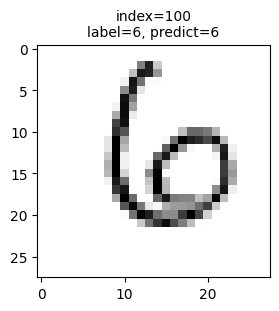

In [8]:
prediction=model.predict(test_images)

plot_image_labels(test_images, test_labels, prediction, 100)

**Evaluating the model on new data**

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test accuracy: {test_acc}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0645 - accuracy: 0.9820
test accuracy: 0.9819999933242798


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [10]:
import numpy as np
x = np.array(12)
x

array(12)

In [11]:
x.ndim

0

### Vectors (rank-1 tensors)

In [12]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [13]:
x.ndim

1

### Matrices (rank-2 tensors)

In [14]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [15]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [16]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [17]:
train_images.ndim

3

In [18]:
train_images.shape

(60000, 28, 28)

In [19]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

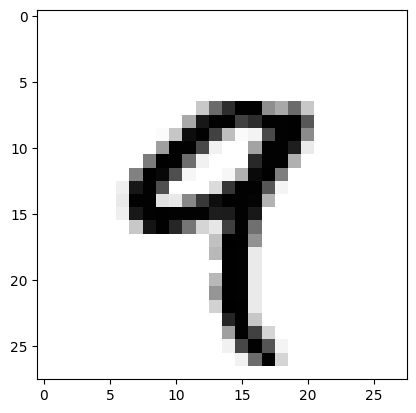

In [20]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [21]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [22]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [23]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [24]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [25]:
my_slice = train_images[:, 14:, 14:]

In [26]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

In [27]:
batch = train_images[:128]

In [28]:
batch = train_images[128:256]

In [29]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [30]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [31]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [32]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [33]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 3.12 s


### Broadcasting

In [34]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [35]:
y = np.expand_dims(y, axis=0)

In [36]:
Y = np.concatenate([y] * 32, axis=0)

In [37]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [38]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [39]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [40]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [41]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [42]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [43]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [44]:
train_images = train_images.reshape((60000, 28 * 28))

In [45]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [46]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [47]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [48]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [49]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [50]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [51]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [52]:
model = Sequential([
    Dense(512, activation="relu"),
    Dense(10, activation="softmax")
])

In [53]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [54]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2589 - accuracy: 0.9258
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1038 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0688 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0497 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0372 - accuracy: 0.9886


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [55]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [56]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [57]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [58]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [59]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [60]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [61]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [62]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [63]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 4.09
loss at batch 100: 2.25
loss at batch 200: 2.24
loss at batch 300: 2.09
loss at batch 400: 2.25
Epoch 1
loss at batch 0: 1.92
loss at batch 100: 1.90
loss at batch 200: 1.87
loss at batch 300: 1.71
loss at batch 400: 1.86
Epoch 2
loss at batch 0: 1.59
loss at batch 100: 1.60
loss at batch 200: 1.55
loss at batch 300: 1.43
loss at batch 400: 1.54
Epoch 3
loss at batch 0: 1.34
loss at batch 100: 1.36
loss at batch 200: 1.28
loss at batch 300: 1.21
loss at batch 400: 1.30
Epoch 4
loss at batch 0: 1.14
loss at batch 100: 1.18
loss at batch 200: 1.07
loss at batch 300: 1.05
loss at batch 400: 1.12
Epoch 5
loss at batch 0: 0.99
loss at batch 100: 1.04
loss at batch 200: 0.92
loss at batch 300: 0.93
loss at batch 400: 1.00
Epoch 6
loss at batch 0: 0.88
loss at batch 100: 0.93
loss at batch 200: 0.82
loss at batch 300: 0.84
loss at batch 400: 0.90
Epoch 7
loss at batch 0: 0.79
loss at batch 100: 0.84
loss at batch 200: 0.73
loss at batch 300: 0.77
loss at batch 40

### Evaluating the model

In [64]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.81


## Summary